<a href="https://colab.research.google.com/github/barta3235/working_model_VGG19/blob/main/VGG19_98R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import cv2
import matplotlib.pyplot as plt
!pip install lime
from lime.lime_image import LimeImageExplainer
import skimage.color as color
from skimage.segmentation import mark_boundaries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.models import load_model
import cv2
from lime.lime_image import LimeImageExplainer


<ipython-input-2-2726b41bbe1b>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=3b8c55c6eb5fb3028575d0127c38419d434d0ad7b5ce0796c2b3c663c87df57a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
os.chdir('/content/drive/MyDrive/Dataset498R/Positive')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])
os.chdir('/content/drive/MyDrive/Dataset498R/Negative')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
print(len(X))
for i in range(1,3523):
    y.append('N')
print(y)

  0%|          | 0/3531 [00:00<?, ?it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  0%|          | 0/3522 [00:00<?, ?it/s]

7053
['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',

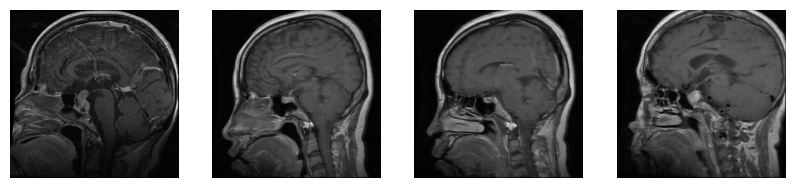

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [6]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (4937, 224, 224, 3)
X_test Shape:  (2116, 224, 224, 3)
y_train Shape:  (4937, 2)
y_test Shape:  (2116, 2)


In [ ]:
from keras.applications import vgg19

img_rows, img_cols = 224, 224

vgg = vgg19.VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_rows, img_cols, 3))

# Freeze the last 4 layers
for layer in vgg.layers:
    layer.trainable = False

for (i, layer) in enumerate(vgg.layers):
    print(str(i) + " " + layer.__class__.__name__, layer.trainable)

80134624/80134624 [==============================] - 0s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 Conv2D False
11 MaxPooling2D False
12 Conv2D False
13 Conv2D False
14 Conv2D False
15 Conv2D False
16 MaxPooling2D False
17 Conv2D False
18 Conv2D False
19 Conv2D False
20 Conv2D False
21 MaxPooling2D False


In [ ]:
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""
    top_model = bottom_model.output
    top_model = Conv2D(256, (3, 3), activation='relu')(top_model)
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

In [ ]:
from keras.layers import GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs=vgg.input, outputs=FC_Head)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.FalsePositives(),
                       tf.keras.metrics.SpecificityAtSensitivity(0.5)])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=3,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    batch_size=32,
                    initial_epoch=0)

Epoch 1/3
155/155 [==============================] - 5853s 38s/step - loss: 0.2627 - accuracy: 0.9500 - true_negatives: 4690.0000 - false_positives: 247.0000 - specificity_at_sensitivity: 0.9905 - val_loss: 0.0672 - val_accuracy: 0.9778 - val_true_negatives: 2069.0000 - val_false_positives: 47.0000 - val_specificity_at_sensitivity: 0.9991
Epoch 2/3
155/155 [==============================] - 5747s 37s/step - loss: 0.0604 - accuracy: 0.9818 - true_negatives: 4847.0000 - false_positives: 90.0000 - specificity_at_sensitivity: 0.9978 - val_loss: 0.0478 - val_accuracy: 0.9858 - val_true_negatives: 2086.0000 - val_false_positives: 30.0000 - val_specificity_at_sensitivity: 0.9991
Epoch 3/3
155/155 [==============================] - 5877s 38s/step - loss: 0.0325 - accuracy: 0.9903 - true_negatives: 4889.0000 - false_positives: 48.0000 - specificity_at_sensitivity: 0.9992 - val_loss: 0.0661 - val_accuracy: 0.9835 - val_true_negatives: 2081.0000 - val_false_positives: 35.0000 - val_specificity_at

In [ ]:
model.save('/content/drive/MyDrive/498R_models/VGG19-Model101')

In [ ]:
from tensorflow.keras.models import load_model

tempModel = load_model('/content/drive/MyDrive/498R_models/VGG19-Model101')
history = tempModel.fit(X_train,y_train,
                    epochs=6,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    batch_size=32,
                    initial_epoch=3)

Epoch 4/6
155/155 [==============================] - 5746s 37s/step - loss: 0.0574 - accuracy: 0.9880 - true_negatives: 4878.0000 - false_positives: 59.0000 - specificity_at_sensitivity: 0.9974 - val_loss: 0.0786 - val_accuracy: 0.9759 - val_true_negatives: 2065.0000 - val_false_positives: 51.0000 - val_specificity_at_sensitivity: 0.9981
Epoch 5/6
155/155 [==============================] - 5700s 37s/step - loss: 0.0605 - accuracy: 0.9899 - true_negatives: 4887.0000 - false_positives: 50.0000 - specificity_at_sensitivity: 0.9980 - val_loss: 0.0475 - val_accuracy: 0.9891 - val_true_negatives: 2093.0000 - val_false_positives: 23.0000 - val_specificity_at_sensitivity: 0.9976
Epoch 6/6
155/155 [==============================] - 5668s 37s/step - loss: 0.0169 - accuracy: 0.9955 - true_negatives: 4915.0000 - false_positives: 22.0000 - specificity_at_sensitivity: 0.9994 - val_loss: 0.0910 - val_accuracy: 0.9863 - val_true_negatives: 2087.0000 - val_false_positives: 29.0000 - val_specificity_at_

In [ ]:
tempModel.save('/content/drive/MyDrive/498R_models/VGG19-Model102')

In [7]:
from tensorflow.keras.models import load_model

tempModel2 = load_model('/content/drive/MyDrive/498R_models/VGG19-Model102')
history = tempModel2.fit(X_train,y_train,
                    epochs=9,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    batch_size=32,
                    initial_epoch=6)

Epoch 7/9
155/155 [==============================] - 5996s 39s/step - loss: 0.0227 - accuracy: 0.9949 - true_negatives: 4912.0000 - false_positives: 25.0000 - specificity_at_sensitivity: 0.9992 - val_loss: 0.0889 - val_accuracy: 0.9849 - val_true_negatives: 2084.0000 - val_false_positives: 32.0000 - val_specificity_at_sensitivity: 0.9934
Epoch 8/9
155/155 [==============================] - 5919s 38s/step - loss: 0.0279 - accuracy: 0.9925 - true_negatives: 4900.0000 - false_positives: 37.0000 - specificity_at_sensitivity: 0.9990 - val_loss: 0.0645 - val_accuracy: 0.9868 - val_true_negatives: 2088.0000 - val_false_positives: 28.0000 - val_specificity_at_sensitivity: 0.9957
Epoch 9/9
155/155 [==============================] - 5781s 37s/step - loss: 0.0112 - accuracy: 0.9970 - true_negatives: 4922.0000 - false_positives: 15.0000 - specificity_at_sensitivity: 0.9998 - val_loss: 0.1051 - val_accuracy: 0.9887 - val_true_negatives: 2092.0000 - val_false_positives: 24.0000 - val_specificity_at_

In [8]:
tempModel2.save('/content/drive/MyDrive/498R_models/VGG19-Model103')

In [ ]:
from tensorflow.keras.models import load_model

tempModel3 = load_model('/content/drive/MyDrive/498R_models/VGG19-Model103')
history = tempModel3.fit(X_train,y_train,
                    epochs=10,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    batch_size=32,
                    initial_epoch=9)

Epoch 10/10
155/155 [==============================] - ETA: 0s - loss: 0.0469 - accuracy: 0.9955 - true_negatives: 4915.0000 - false_positives: 22.0000 - specificity_at_sensitivity: 0.9978 

In [10]:
tempModel3.save('/content/drive/MyDrive/498R_models/VGG19-Model104')

67/67 [==============================] - 1492s 22s/step


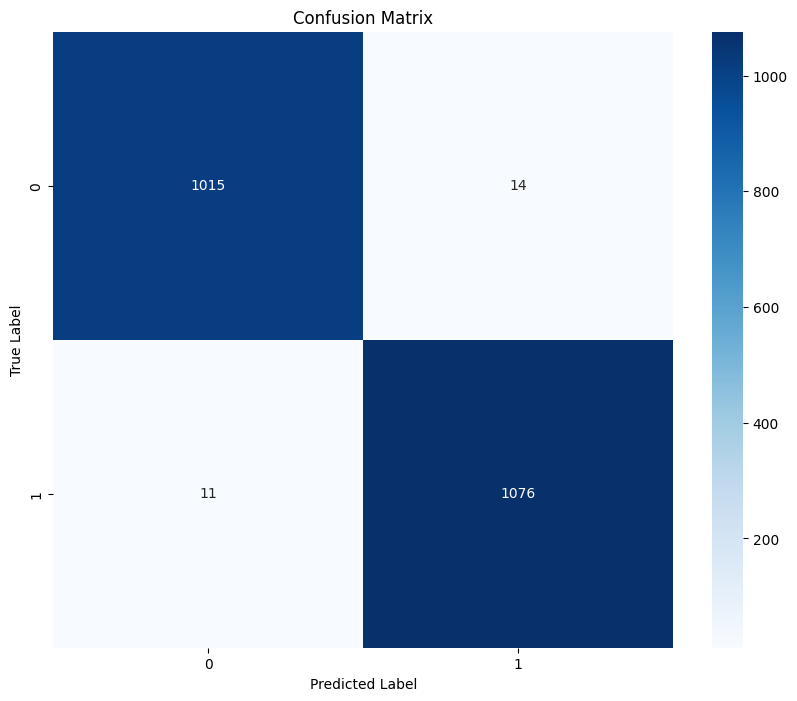

In [7]:
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('/content/drive/MyDrive/498R_models/VGG19-Model104')

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Assuming a classification problem with softmax output
y_true = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Testing the model**